In [1]:
import netCDF4 as nc
from matplotlib import pyplot as plt
import numpy as np
import glob
import pickle
from salishsea_tools import evaltools as et
import datetime as dt
import os
import re
import cmocean
%matplotlib inline

In [2]:
ignorelist=('nav_lat','nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'bounds_lon','bounds_lat',
            'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 
            'time_counter', 'time_counter_bounds','nav_lat_grid_T', 'nav_lon_grid_T', 
            'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 
            'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 
            'bounds_nav_lat_grid_W', 'area_grid_W', 'time_centered', 'time_centered_bounds',
            'depthu', 'depthu_bounds','depthv', 'depthv_bounds','depthw', 'depthw_bounds',
            'layer6m_W', 'layer6m_W_bounds','bounds_lon_grid_T','bounds_lat_grid_T',
            'bounds_lon_grid_W','bounds_lat_grid_W','time_instant_bounds','time_instant')
def checkall(ff):
    fkeys=ff.variables.keys()
    print('fP.variables.keys():',fkeys)
    print('Min/Max:')
    for var in fkeys:
        if var not in ignorelist:
            #print(var)
            if len(np.shape(ff.variables[var]))==4:
                print(var,':',np.min(np.ma.masked_where(tmask[:,:,:]==0,ff.variables[var][-1,:,:,:])),
                      np.max(np.ma.masked_where(tmask[:,:,:]==0,ff.variables[var][-1,:,:,:])))
            elif len(np.shape(ff.variables[var]))==3:
                print(var,':',np.min(np.ma.masked_where(tmask[0,:,:]==0,ff.variables[var][-1,:,:])),
                      np.max(np.ma.masked_where(tmask[0,:,:]==0,ff.variables[var][-1,:,:])))
            else: 
                print('unknown shape: ',var,len(np.shape(ff.variables[var])))
def checkallSlice(ff):
    fkeys=ff.variables.keys()
    print('fP.variables.keys():',fkeys)
    print('Min/Max:')
    for var in fkeys:
        if var not in ignorelist:
            print(var,':',np.min(ff.variables[var][-1,:,:,:]),
                      np.max(ff.variables[var][-1,:,:,:]))

In [3]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][0,:,:,:]
    e1t=np.expand_dims(mesh.variables['e1t'][:,:,:],1)
    e2t=np.expand_dims(mesh.variables['e2t'][:,:,:],1)
SOGtmaskPath='/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/SOGtmask.pkl'
(tmaskSOG,_,_,_,_)=pickle.load(open(SOGtmaskPath,'rb'))

In [4]:
idir='/data/eolson/results/MEOPAR/SS36runs/GrahamRuns/tvdTest/'
ts=dt.datetime(2015,4,1)
te=dt.datetime(2015,4,30)

In [5]:
fVlist=et.index_model_files_flex(idir,'ptrc_T','1d','long',ts,te)

In [6]:
fPlist=et.index_model_files_flex(idir,'dian_T','1d','long',ts,te)
fDlist=et.index_model_files_flex(idir,'dia1_T','1d','long',ts,te)
fSlist=et.index_model_files_flex(idir,'snp_T','1d','long',ts,te)
fRlist=et.index_model_files_flex(idir,'rad_T','1d','long',ts,te)

In [7]:
fPlist.head()

,paths,t_0,t_n
0,/data/eolson/results/MEOPAR/SS36runs/GrahamRun...,2015-04-01,2015-04-11
1,/data/eolson/results/MEOPAR/SS36runs/GrahamRun...,2015-04-11,2015-04-21
2,/data/eolson/results/MEOPAR/SS36runs/GrahamRun...,2015-04-21,2015-05-01


In [8]:
fDlist.head()

,paths,t_0,t_n
0,/data/eolson/results/MEOPAR/SS36runs/GrahamRun...,2015-04-01,2015-04-11
1,/data/eolson/results/MEOPAR/SS36runs/GrahamRun...,2015-04-11,2015-04-21
2,/data/eolson/results/MEOPAR/SS36runs/GrahamRun...,2015-04-21,2015-05-01


In [9]:
fSlist.tail()

,paths,t_0,t_n
0,/data/eolson/results/MEOPAR/SS36runs/GrahamRun...,2015-04-01,2015-04-11
1,/data/eolson/results/MEOPAR/SS36runs/GrahamRun...,2015-04-11,2015-04-21
2,/data/eolson/results/MEOPAR/SS36runs/GrahamRun...,2015-04-21,2015-05-01


In [10]:
with nc.Dataset(fVlist.paths[0]) as ff:
    checkall(ff)

fP.variables.keys(): dict_keys(['nav_lat_grid_T', 'nav_lon_grid_T', 'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 'deptht', 'deptht_bounds', 'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 'bounds_nav_lat_grid_W', 'area_grid_W', 'depthw', 'depthw_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'nitrate', 'ammonium', 'silicon', 'diatoms', 'ATZ_DIAT', 'ATZ_PON', 'ATZ_NO3', 'NO3TVDZ'])
Min/Max:
nitrate : 0.0 34.07466
ammonium : 0.0 4.2876596
silicon : 0.0 75.62773
diatoms : 0.0 5.39348
ATZ_DIAT : -657.62244 679.259
ATZ_PON : -113.28179 139.93646
ATZ_NO3 : -257021.98 282750.72
NO3TVDZ : -257021.98 282750.72


In [11]:
with nc.Dataset(fPlist.paths[0]) as ff:
    checkall(ff)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'RIV_NO3', 'RIV_DIAT', 'REM_NO3', 'PRD_NO3'])
Min/Max:
RIV_NO3 : 0.0 7987.236
RIV_DIAT : 0.0 1.0301969
REM_NO3 : 0.0 5.755795
PRD_NO3 : -0.619016 0.0


In [12]:
with nc.Dataset(fDlist.paths[0]) as ff:
    checkall(ff)

fP.variables.keys(): dict_keys(['nav_lat_grid_T', 'nav_lon_grid_T', 'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 'deptht', 'deptht_bounds', 'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 'bounds_nav_lat_grid_W', 'area_grid_W', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATF_NO3', 'ATF_DIAT', 'BFX_PON', 'BFX_DIAT'])
Min/Max:
ATF_NO3 : -0.6674104 0.8214614
ATF_DIAT : -0.105459005 0.027418042
BFX_PON : -2339.6868 0.0
BFX_DIAT : -258.59763 0.0


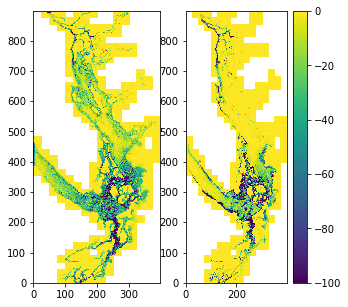

In [13]:
fig,ax=plt.subplots(1,2,figsize=(5,5))
with nc.Dataset(fDlist.paths[0]) as ff:
    m=ax[0].pcolormesh(ff.variables['BFX_PON'][0,:,:],vmin=-100,vmax=0)
    ax[1].pcolormesh(ff.variables['BFX_DIAT'][0,:,:],vmin=-100,vmax=0)
fig.colorbar(m)

In [14]:
with nc.Dataset(fSlist.paths[0]) as ff:
    checkall(ff)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_instant', 'time_instant_bounds', 'time_counter', 'time_counter_bounds', 'NO3_E3TSNAP', 'DIAT_E3TSNAP'])
Min/Max:
NO3_E3TSNAP : 0.0 899.2107
DIAT_E3TSNAP : 0.0 46.156677


In [15]:
with nc.Dataset(fRlist.paths[0]) as ff:
    checkall(ff)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'RDB_NO3', 'RDB_DIAT', 'RDN_NO3', 'RDN_DIAT'])
Min/Max:
RDB_NO3 : 0.0 0.0
RDB_DIAT : 0.0 0.10537138
RDN_NO3 : 0.0 0.0
RDN_DIAT : 0.0 1.054423


In [16]:
rivNO3Sum=list(); rivDIATSum=list(); nitrSum=list();  prdNO3Sum=list(); 

radSum=list();
for i,r in fPlist.iterrows():
    with nc.Dataset(r['paths']) as f:
        if r['t_n']<(te+dt.timedelta(days=1)):
            rivNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['RIV_NO3'][:,:,:,:],3),2),1))
            rivDIATSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['RIV_DIAT'][:,:,:,:],3),2),1))
            nitrSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['REM_NO3'][:,:,:,:],3),2),1))
            prdNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['PRD_NO3'][:,:,:,:],3),2),1))
        else:
            iiend=(te-r['t_0']).days+1
            rivNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['RIV_NO3'][:iiend,:,:,:],3),2),1))
            rivDIATSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['RIV_DIAT'][:iiend,:,:,:],3),2),1))
            nitrSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['REM_NO3'][:iiend,:,:,:],3),2),1))
            prdNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['PRD_NO3'][:iiend,:,:,:],3),2),1))
rivNO3Sum=np.concatenate(rivNO3Sum,axis=0)
rivDIATSum=np.concatenate(rivDIATSum,axis=0)
nitrSum=np.concatenate(nitrSum,axis=0)
prdNO3Sum=np.concatenate(prdNO3Sum,axis=0)

In [17]:
radNO3Sum=list();radDIATSum=list(); 
for i,r in fRlist.iterrows():
    with nc.Dataset(r['paths']) as f:
        if r['t_n']<(te+dt.timedelta(days=1)):
            radNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*(f.variables['RDB_NO3'][:,:,:,:]+\
                                                            f.variables['RDN_NO3'][:,:,:,:]),3),2),1))
            radDIATSum.append(np.sum(np.sum(np.sum(tmaskSOG*(f.variables['RDB_DIAT'][:,:,:,:]+\
                                                            f.variables['RDN_DIAT'][:,:,:,:]),3),2),1))
        else:
            iiend=(te-r['t_0']).days+1
            radNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*(f.variables['RDB_NO3'][:iiend,:,:,:]+\
                                                            f.variables['RDN_NO3'][:iiend,:,:,:]),3),2),1))
            radDIATSum.append(np.sum(np.sum(np.sum(tmaskSOG*(f.variables['RDB_DIAT'][:iiend,:,:,:]+\
                                                            f.variables['RDN_DIAT'][:iiend,:,:,:]),3),2),1))
radNO3Sum=np.concatenate(radNO3Sum,axis=0)
radDIATSum=np.concatenate(radDIATSum,axis=0)

In [18]:
ATFNO3Sum=list(); ATFDIATSum=list(); 
BFXPONSum=list(); BFXDIATSum=list();
for i,r in fDlist.iterrows():
    with nc.Dataset(r['paths']) as f:
        if r['t_n']<(te+dt.timedelta(days=1)):
            ATFNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['ATF_NO3'][:,:,:,:],3),2),1))
            ATFDIATSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['ATF_DIAT'][:,:,:,:],3),2),1))
            BFXPONSum.append(np.sum(np.sum(tmaskSOG[:,0,:,:]*f.variables['BFX_PON'][:,:,:],2),1))
            BFXDIATSum.append(np.sum(np.sum(tmaskSOG[:,0,:,:]*f.variables['BFX_DIAT'][:,:,:],2),1))
        else:
            iiend=(te-r['t_0']).days+1
            ATFNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['ATF_NO3'][:iiend,:,:,:],3),2),1))
            ATFDIATSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['ATF_DIAT'][:iiend,:,:,:],3),2),1))
            BFXPONSum.append(np.sum(np.sum(tmaskSOG[:,0,:,:]*f.variables['BFX_PON'][:iiend,:,:],2),1))
            BFXDIATSum.append(np.sum(np.sum(tmaskSOG[:,0,:,:]*f.variables['BFX_DIAT'][:iiend,:,:],2),1))
ATFNO3Sum=np.concatenate(ATFNO3Sum,axis=0)
ATFDIATSum=np.concatenate(ATFDIATSum,axis=0)
BFXPONSum=np.concatenate(BFXPONSum,axis=0)
BFXDIATSum=np.concatenate(BFXDIATSum,axis=0)

In [19]:
NO3Sum=list(); DIATSum=list(); 
for i,r in fSlist.iterrows():
    with nc.Dataset(r['paths']) as f:
        if r['t_n']<(te+dt.timedelta(days=1)):
            NO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*f.variables['NO3_E3TSNAP'][:,:,:,:],3),2),1))
            DIATSum.append(np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*f.variables['DIAT_E3TSNAP'][:,:,:,:],3),2),1))
        else:
            iiend=(te-r['t_0']).days+1
            NO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*f.variables['NO3_E3TSNAP'][:iiend,:,:,:],3),2),1))
            DIATSum.append(np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*f.variables['DIAT_E3TSNAP'][:iiend,:,:,:],3),2),1))
NO3Sum=np.concatenate(NO3Sum,axis=0)
DIATSum=np.concatenate(DIATSum,axis=0)

In [20]:
NO3diff=(NO3Sum[1:]-NO3Sum[:-1])/(24*3600)
DIATdiff=(DIATSum[1:]-DIATSum[:-1])/(24*3600)

Text(0.5, 1.0, 'DIAT')

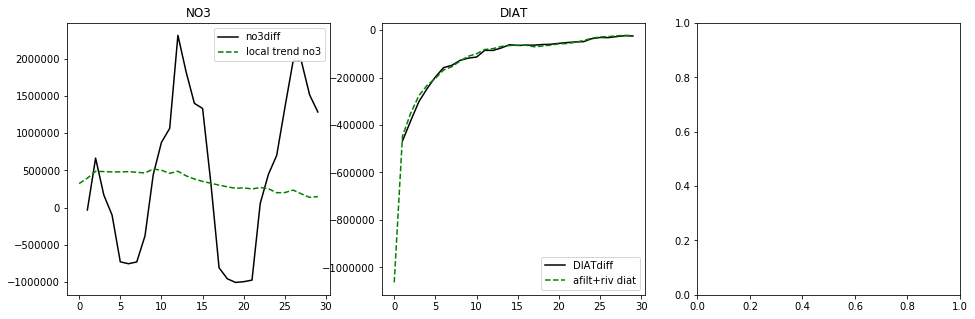

In [21]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(range(1,len(NO3diff)+1),NO3diff,'k-',label='no3diff')
ax[0].plot(range(0,len(prdNO3Sum)),prdNO3Sum+nitrSum+ATFNO3Sum+rivNO3Sum,'g--',label='local trend no3')
ax[0].legend()
ax[0].set_title('NO3')
ax[1].plot(range(1,len(DIATdiff)+1),DIATdiff,'k-',label='DIATdiff')
ax[1].plot(range(0,len(ATFDIATSum)),ATFDIATSum+rivDIATSum+BFXDIATSum,'g--',label='afilt+riv diat')
ax[1].legend()
ax[1].set_title('DIAT')

In [22]:
varsXr={'ATNO3':'ATX_NO3', 'ATDIAT':'ATX_DIAT', 
        'DTNO3':'DTX_NO3', 'DTDIAT':'DTX_DIAT'}
varsYr={'ATNO3':'ATY_NO3', 'ATDIAT':'ATY_DIAT', 
        'DTNO3':'DTY_NO3', 'DTDIAT':'DTY_DIAT'}
varsX = {v: k for k, v in varsXr.items()}
varsY = {v: k for k, v in varsYr.items()}
locs=('mal','har','sjc','ros','dis','sut')
dirs={'mal':-1,'har':1,'sjc':1,'ros':1,'dis':-1,'sut':-1} # in or out of domain
transps=dict();
fnames={'mal':'Malaspina_U','har':'Haro_V','sjc':'SJC_V','ros':'Rosario_V','dis':'Discovery_V','sut':'Sutil_V'}
for iloc in locs:
    transps[iloc]=dict()

In [23]:
for ivar, inam in varsX.items():
    print(ivar,inam)

ATX_NO3 ATNO3
ATX_DIAT ATDIAT
DTX_NO3 DTNO3
DTX_DIAT DTDIAT


In [24]:
# x-dir
iloc='mal'
flist=et.index_model_files_flex(idir,'Malaspina_U','1d','long',ts,te)
vls=dict()
for inam in varsX.values():
    vls[inam]=list()
for i,r in flist.iterrows():
    with nc.Dataset(r['paths']) as f:
        if r['t_n']<(te+dt.timedelta(days=1)):
            for ivar, inam in varsX.items():
                vls[inam].append(np.sum(np.sum(f.variables[ivar][:,:,:,0],2),1))
        else:
            iiend=(te-r['t_0']).days+1
            for ivar, inam in varsX.items():
                vls[inam].append(np.sum(np.sum(f.variables[ivar][:iiend,:,:,0],2),1))
for inam in varsX.values():
    transps[iloc][inam]=dirs[iloc]*np.concatenate(vls[inam],axis=0)

In [25]:
for iloc in ('har','sjc','ros','dis','sut'): # y-dir
    flist=et.index_model_files_flex(idir,fnames[iloc],'1d','long',ts,te)
    vls=dict()
    for inam in varsY.values():
        vls[inam]=list()
    for i,r in flist.iterrows():
        with nc.Dataset(r['paths']) as f:
            if r['t_n']<(te+dt.timedelta(days=1)):
                for ivar, inam in varsY.items():
                    vls[inam].append(np.sum(np.sum(f.variables[ivar][:,:,0,:],2),1))
            else:
                iiend=(te-r['t_0']).days+1
                for ivar, inam in varsY.items():
                    vls[inam].append(np.sum(np.sum(f.variables[ivar][:iiend,:,0,:],2),1))
    for inam in varsY.values():
        transps[iloc][inam]=dirs[iloc]*np.concatenate(vls[inam],axis=0)

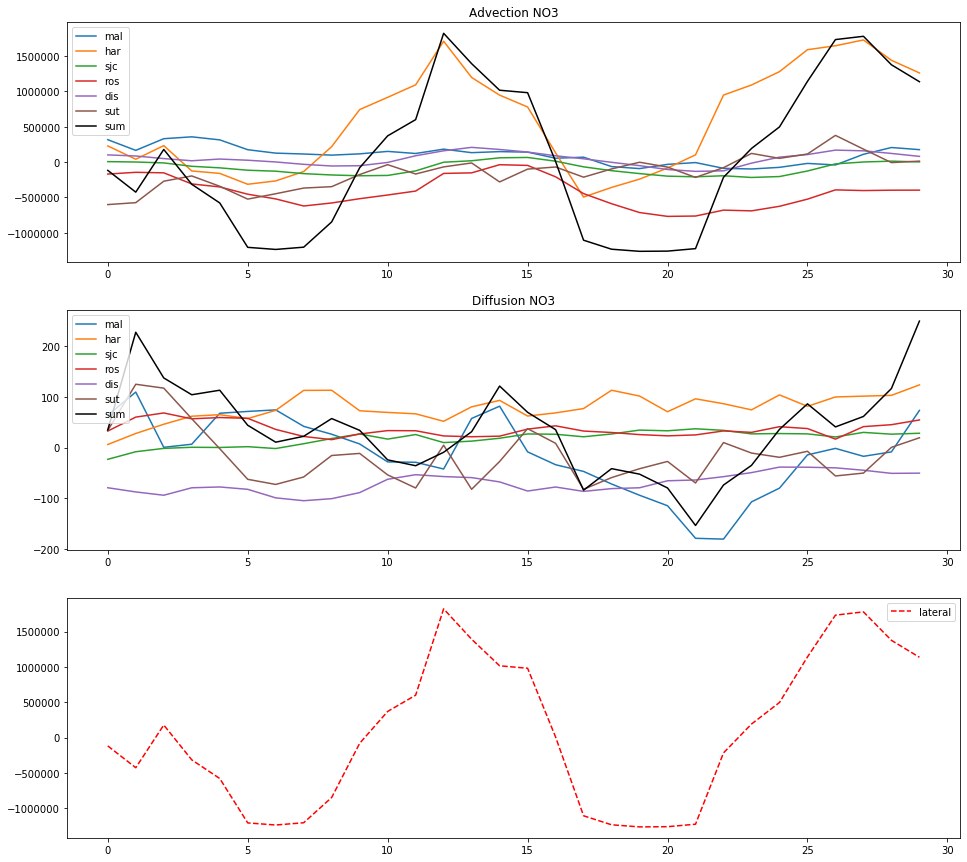

In [26]:
fig,ax=plt.subplots(3,1,figsize=(16,15))
advNO3=np.zeros(np.shape(transps['mal']['ATNO3']))
for iloc in locs:
    ax[0].plot(range(0,len(transps[iloc]['ATNO3'])),transps[iloc]['ATNO3'],label=iloc)
    advNO3=advNO3+transps[iloc]['ATNO3']
ax[0].plot(range(0,len(transps[iloc]['ATNO3'])),advNO3,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection NO3')

difNO3=np.zeros(np.shape(transps['mal']['DTNO3']))
for iloc in locs:
    ax[1].plot(range(0,len(transps[iloc]['DTNO3'])),transps[iloc]['DTNO3'],label=iloc)
    difNO3=difNO3+transps[iloc]['DTNO3']
ax[1].plot(range(0,len(transps[iloc]['DTNO3'])),difNO3,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion NO3')

#ax[2].plot(range(0,len(transps[iloc]['DTNO3'])),PHSNO3Sum,'k-',label='phys')
ax[2].plot(range(0,len(transps[iloc]['DTNO3'])),advNO3+difNO3,'r--',label='lateral')
ax[2].legend()

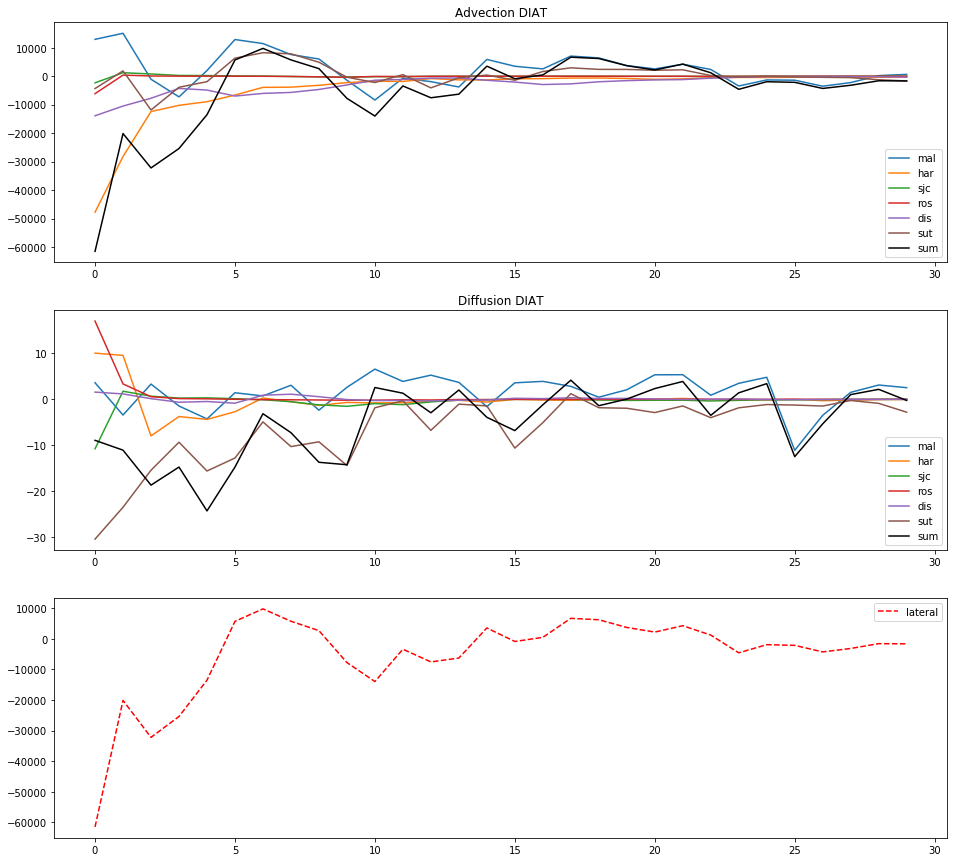

In [27]:
fig,ax=plt.subplots(3,1,figsize=(16,15))
advDIAT=np.zeros(np.shape(transps['mal']['ATDIAT']))
for iloc in locs:
    ax[0].plot(range(0,len(transps[iloc]['ATDIAT'])),transps[iloc]['ATDIAT'],label=iloc)
    advDIAT=advDIAT+transps[iloc]['ATDIAT']
ax[0].plot(range(0,len(transps[iloc]['ATDIAT'])),advDIAT,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection DIAT')

difDIAT=np.zeros(np.shape(transps['mal']['DTDIAT']))
for iloc in locs:
    ax[1].plot(range(0,len(transps[iloc]['DTDIAT'])),transps[iloc]['DTDIAT'],label=iloc)
    difDIAT=difDIAT+transps[iloc]['DTDIAT']
ax[1].plot(range(0,len(transps[iloc]['DTDIAT'])),difDIAT,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion DIAT')

ax[2].plot(range(0,len(transps[iloc]['DTDIAT'])),advDIAT+difDIAT,'r--',label='lateral')
ax[2].legend()

Text(0.5, 1.0, 'DIAT')

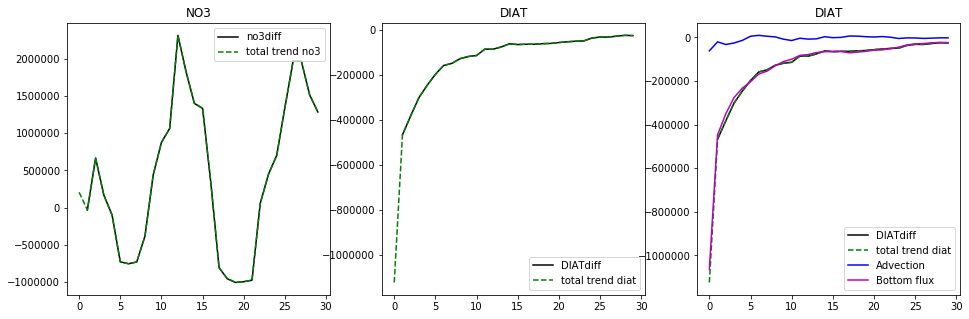

In [36]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(range(1,len(NO3diff)+1),NO3diff,'k-',label='no3diff')
ax[0].plot(range(0,len(prdNO3Sum)),prdNO3Sum+nitrSum+ATFNO3Sum+rivNO3Sum+difNO3+advNO3+radNO3Sum,'g--',label='total trend no3')
ax[0].legend()
ax[0].set_title('NO3')
ax[1].plot(range(1,len(DIATdiff)+1),DIATdiff,'k-',label='DIATdiff')
ax[1].plot(range(0,len(ATFDIATSum)),ATFDIATSum+rivDIATSum+difDIAT+advDIAT+BFXDIATSum+radDIATSum,
           'g--',label='total trend diat')
ax[1].legend()
ax[1].set_title('DIAT')
ax[2].plot(range(1,len(DIATdiff)+1),DIATdiff,'k-',label='DIATdiff')
ax[2].plot(range(0,len(ATFDIATSum)),ATFDIATSum+rivDIATSum+difDIAT+advDIAT+BFXDIATSum+radDIATSum,
           'g--',label='total trend diat')
ax[2].plot(range(0,len(ATFDIATSum)),advDIAT,'b-',label='Advection')
ax[2].plot(range(0,len(ATFDIATSum)),BFXDIATSum,'m-',label='Bottom flux')
ax[2].legend()
ax[2].set_title('DIAT')

### Sums

In [34]:
print('Diatoms')
print('Content Change:','{:.2f}'.format(np.sum(DIATdiff)))
print('Asselin Filter:','{:.2f}'.format(np.sum(ATFDIATSum[1:])))
print('negCorr:','{:.2f}'.format(np.sum(radDIATSum[1:])))
print('river:','{:.2f}'.format(np.sum(rivDIATSum[1:])))
print('Diffusion:','{:.2f}'.format(np.sum(difDIAT[1:])))
print('Advection:','{:.2f}'.format(np.sum(advDIAT[1:])))
print('Bottom Flux:','{:.2f}'.format(np.sum(BFXDIATSum[1:])))

Diatoms
Content Change: -3267925.94
Asselin Filter: -79.39
negCorr: 918.97
river: 162.45
Diffusion: -135.44
Advection: -98619.39
Bottom Flux: -3169759.00


In [37]:
(1092158-1088641)/2160

1.6282407407407407